In [2]:
import os
import sys
import dask.dataframe as dd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [3]:
matplotlib.style.use('ggplot')
sns.set()

In [8]:
plots_dir = os.path.abspath('../plots')
events_filename = os.path.abspath('../data/EVENTS-short.csv')

'/home/rui/BDCC/proj2/data/EVENTS-short.csv'

In [10]:
events_df = dd.read_csv(events_filename, parse_dates=['CHARTTIME', 'STORETIME'], dtype={
    'CGID': 'Int64', 'ICUSTAY_ID': 'Int64'
})

events_df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CHARTTIME,STORETIME,CGID,VALUE,VALUENUM,VALUEUOM,WARNING,ERROR,RESULTSTATUS,STOPPED
0,788,36,165660,241249,223834,2134-05-12 12:00:00,2134-05-12 13:56:00,17525,15.00,15.00,L/min,0,0,NaN,NaN
1,789,36,165660,241249,223835,2134-05-12 12:00:00,2134-05-12 13:56:00,17525,100.00,100.00,NaN,0,0,NaN,NaN
2,790,36,165660,241249,224328,2134-05-12 12:00:00,2134-05-12 12:18:00,20823,0.37,0.37,NaN,0,0,NaN,NaN
3,791,36,165660,241249,224329,2134-05-12 12:00:00,2134-05-12 12:19:00,20823,6.00,6.00,min,0,0,NaN,NaN
4,792,36,165660,241249,224330,2134-05-12 12:00:00,2134-05-12 12:19:00,20823,2.50,2.50,NaN,0,0,NaN,NaN


## Plot item's values over time for ICUSTAY_ID 261926

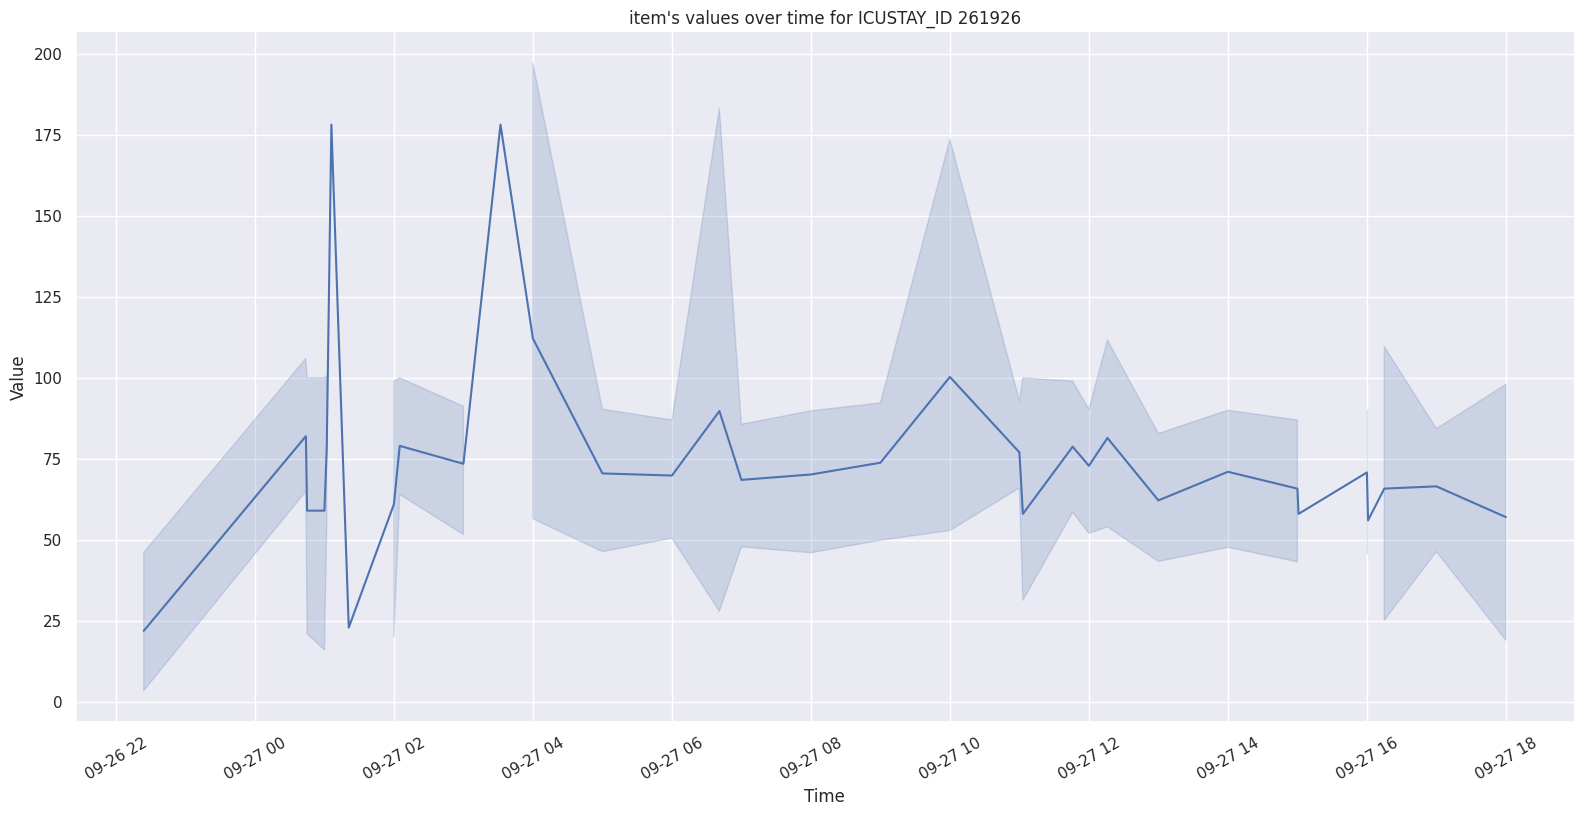

In [33]:
    data = events_df[['SUBJECT_ID', 'VALUENUM', 'ICUSTAY_ID', 'CHARTTIME', 'ITEMID']] \
        .query('ICUSTAY_ID == {}'.format(261926)) \
        .compute()

    plot = sns.relplot(x='CHARTTIME', y='VALUENUM', col='ICUSTAY_ID',
                       kind='line',
                       height=8, aspect=2,
                       data=data).set(title='item\'s values over time for ICUSTAY_ID {}'.format(261926))
    ax = plt.gca()
    ax.set_xlabel('Time')
    ax.set_ylabel('Value')
    plt.xticks(rotation=30)

    plot.figure.savefig(os.path.join(plots_dir, 'item-histogram-2.png'))

(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.,  70000.,  80000.,  90000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

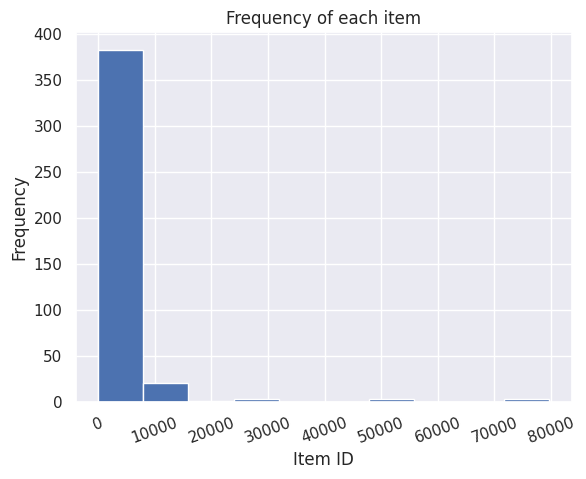

In [57]:
#item frequency
events_df[['ITEMID', 'VALUENUM']].compute()\
        .groupby('ITEMID')\
        .count()\
        .hist()

plt.title('Frequency of each item')

ax = plt.gca()
ax.set_xlabel('Item ID')
ax.set_ylabel('Frequency')
plt.xticks(rotation=20)

In [75]:
def item_plot(item_id, dataframe=events_df):
    dataframe[['ITEMID', 'CHARTTIME', 'VALUENUM']]\
        .query('ITEMID == {}'.format(item_id))\
        .compute()\
        .plot(
            x='CHARTTIME', y='VALUENUM',
            style='.',
            figsize=(16,7),
            title='Values for ITEMID {}'.format(item_id)
        )

    ax = plt.gca()
    ax.set_xlabel('Time')
    ax.set_ylabel('Values')
    plt.xticks(rotation=20)

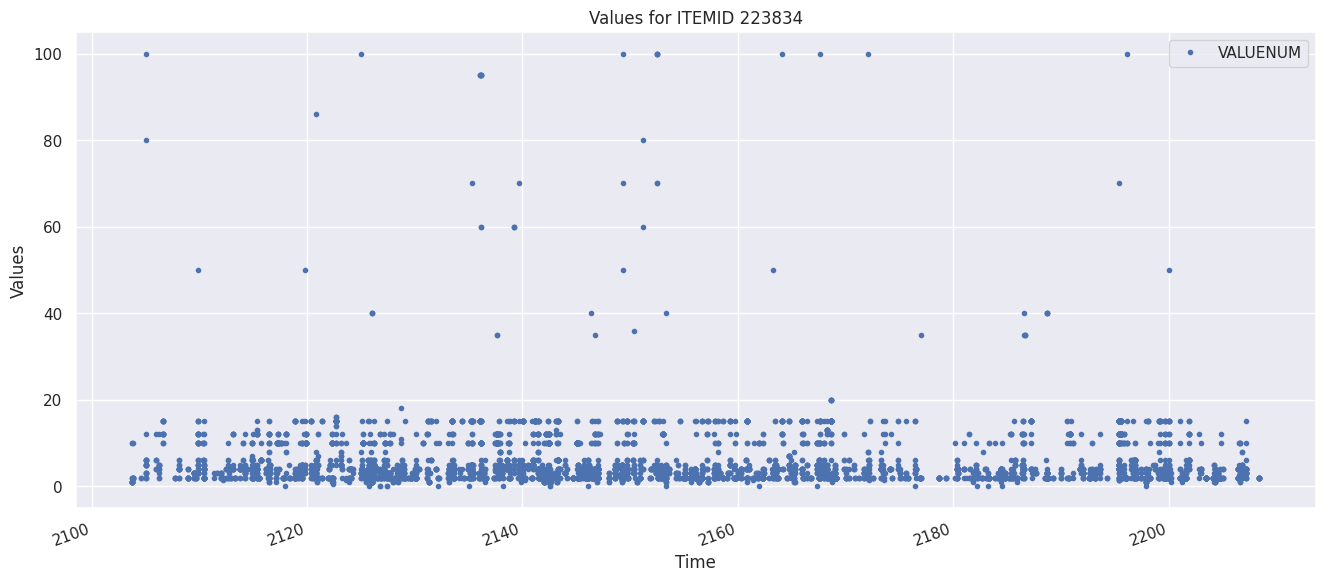

In [98]:
item_plot(    df[['SUBJECT_ID', 'ITEMID', 'VALUENUM', 'HADM_ID']]\
                .query(f'SUBJECT_ID == {patient}')\
                .compute()\
                .groupby('HADM_ID')['ITEMID', 'VALUENUM']\
                .plot(x='ITEMID', y='VALUENUM', kind='scatter', figsize=(14,7), title="Values per patient", c="b"))

/tmp/ipykernel_145530/1550796604.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  events_df[['SUBJECT_ID', 'ITEMID', 'VALUENUM', 'HADM_ID']]\


HADM_ID
138877    AxesSubplot(0.125,0.11;0.775x0.77)
146557    AxesSubplot(0.125,0.11;0.775x0.77)
172563    AxesSubplot(0.125,0.11;0.775x0.77)
172739    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

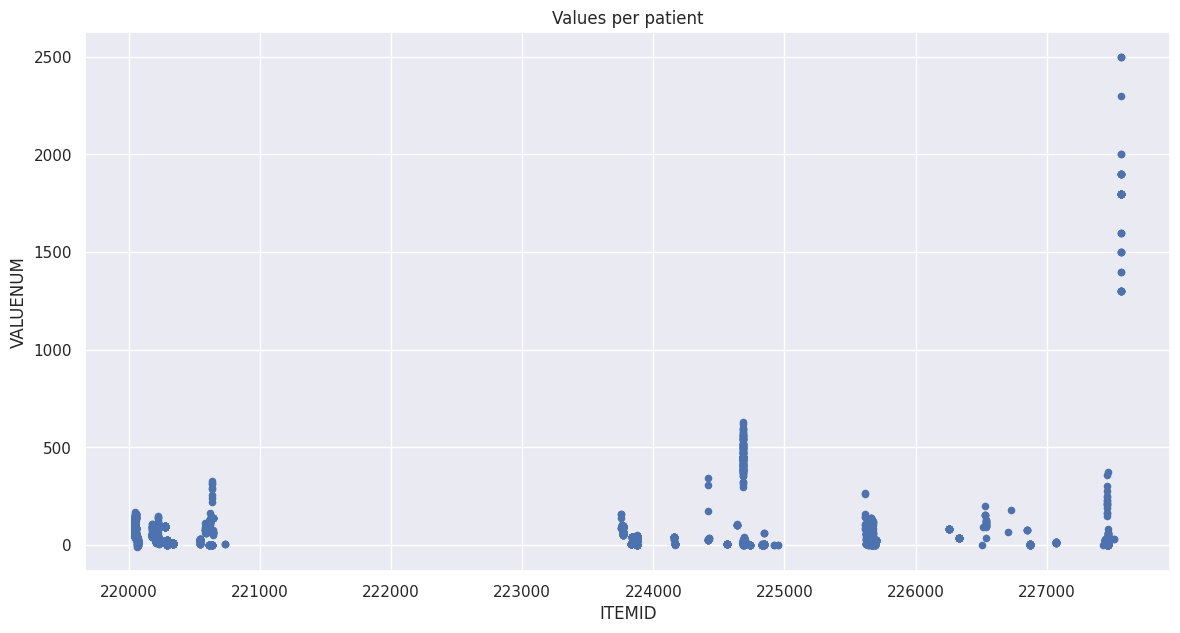

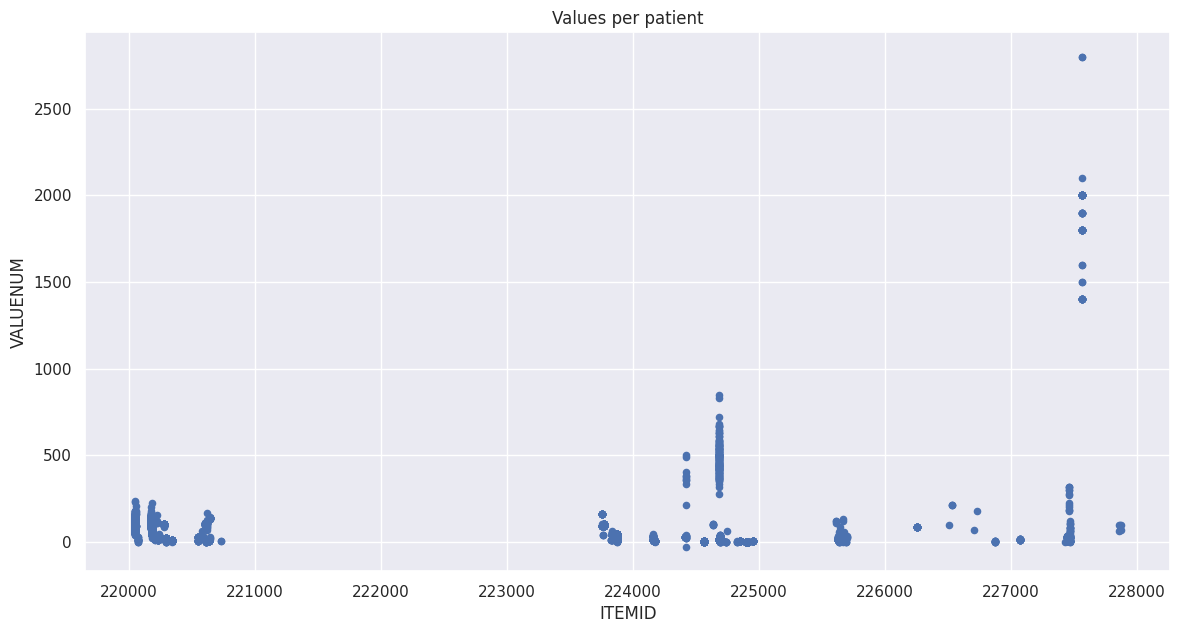

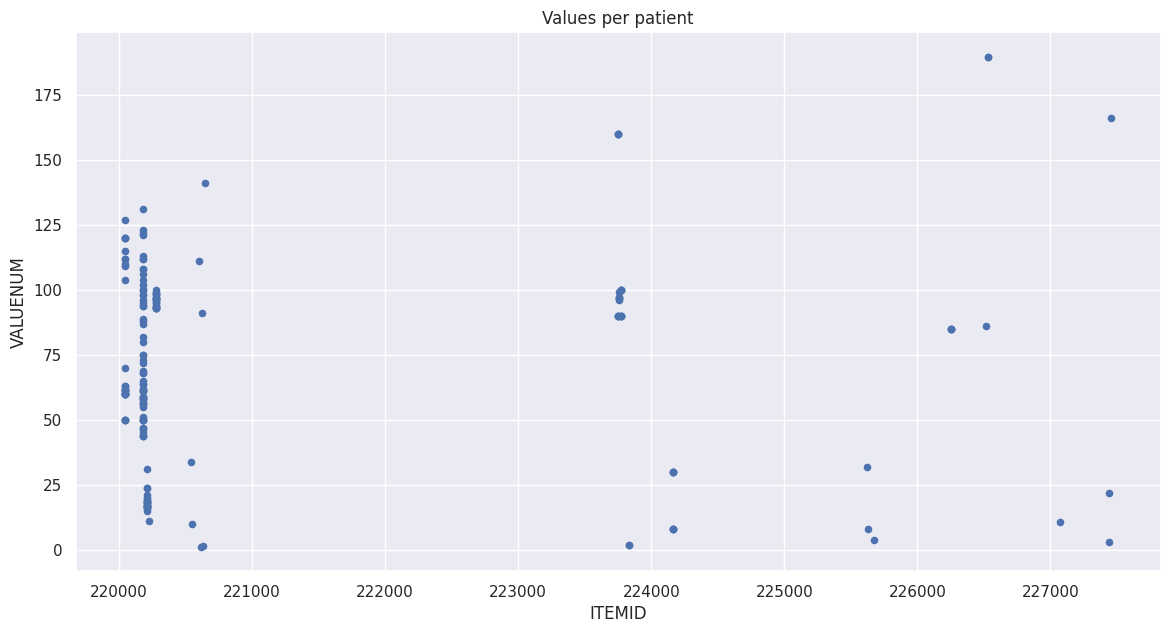

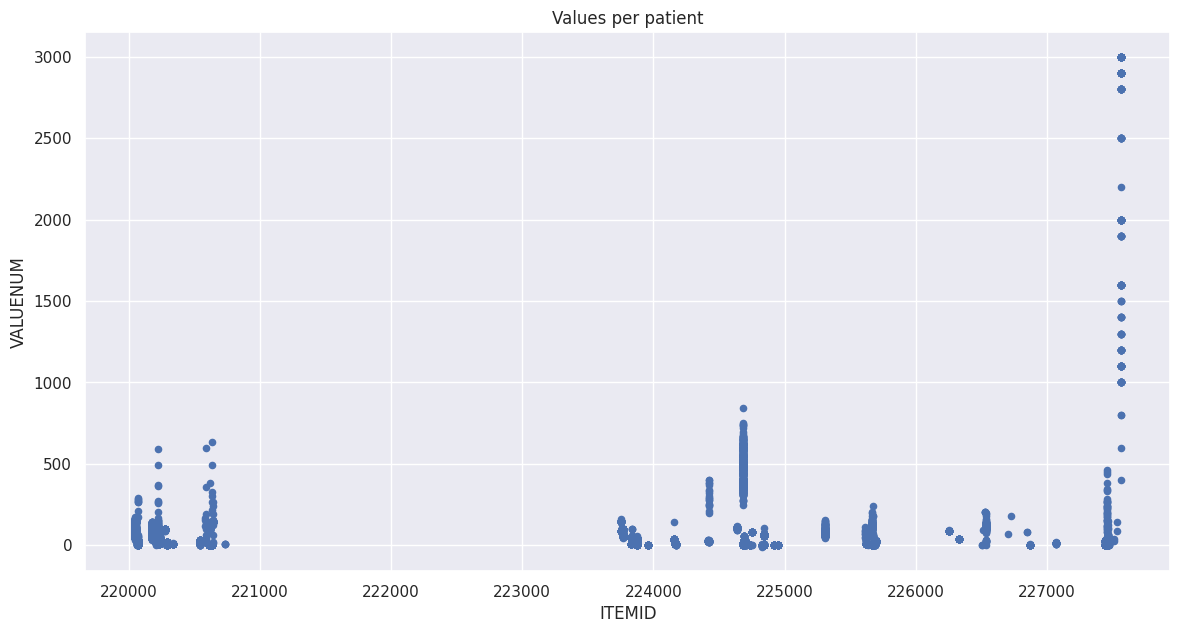

In [99]:
    events_df[['SUBJECT_ID', 'ITEMID', 'VALUENUM', 'HADM_ID']]\
                .query(f'SUBJECT_ID == {2090}')\
                .compute()\
                .groupby('HADM_ID')['ITEMID', 'VALUENUM']\
                .plot(x='ITEMID', y='VALUENUM', kind='scatter', figsize=(14,7), title="Values per patient", c="b")